In [5]:
import numpy as np
import tensorflow as tf

### 데이터 shape 확인

In [3]:
dataset = np.loadtxt('./data_set/pima-indians-diabetes.csv', delimiter = ',')
print(dataset.shape)

(768, 9)


### 데이터 value 확인

In [4]:
X = dataset[:, 0 : 8]
Y = dataset[:, -1]

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

## Sequential 모델 사용

In [6]:
model = tf.keras.Sequential(name = 'Sequential')
model.add(tf.keras.layers.Input(shape = (8, ), name = 'input'))
model.add(tf.keras.layers.Dense(units = 12, activation = 'relu', name = 'dense1'))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu', name = 'dense2'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'output'))

model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 12)                108       
_________________________________________________________________
dense2 (Dense)               (None, 8)                 104       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = 'binary_crossentropy', # 결과가 0 또는 1로 두개이기때문에 // 다중일 경우 categorical_crossentropy
              optimizer = 'adam', metrics = ['acc']
             )

model.fit(X, Y, epochs = 100, batch_size = 70)
## overfitting 확인은 callback 함수 사용해야 한다

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 0.6384 - acc: 0.6576
Epoch 2/100
11/11 [==============================] - 0s 729us/step - loss: 0.6305 - acc: 0.6693
Epoch 3/100
11/11 [==============================] - 0s 711us/step - loss: 0.6362 - acc: 0.6562
Epoch 4/100
11/11 [==============================] - 0s 749us/step - loss: 0.6275 - acc: 0.6784
Epoch 5/100
11/11 [==============================] - 0s 681us/step - loss: 0.6226 - acc: 0.6784
Epoch 6/100
11/11 [==============================] - 0s 697us/step - loss: 0.6215 - acc: 0.6914
Epoch 7/100
11/11 [==============================] - 0s 775us/step - loss: 0.6178 - acc: 0.6810
Epoch 8/100
11/11 [==============================] - 0s 676us/step - loss: 0.6170 - acc: 0.6849
Epoch 9/100
11/11 [==============================] - 0s 687us/step - loss: 0.6141 - acc: 0.6992
Epoch 10/100
11/11 [==============================] - 0s 760us/step - loss: 0.6113 - acc: 0.6953
Epoch 11/100
11/11 [=====================

11/11 [==============================] - 0s 870us/step - loss: 0.5282 - acc: 0.7500
Epoch 86/100
11/11 [==============================] - 0s 713us/step - loss: 0.5267 - acc: 0.7461
Epoch 87/100
11/11 [==============================] - 0s 774us/step - loss: 0.5267 - acc: 0.7474
Epoch 88/100
11/11 [==============================] - 0s 741us/step - loss: 0.5246 - acc: 0.7513
Epoch 89/100
11/11 [==============================] - 0s 678us/step - loss: 0.5262 - acc: 0.7474
Epoch 90/100
11/11 [==============================] - 0s 772us/step - loss: 0.5372 - acc: 0.7448
Epoch 91/100
11/11 [==============================] - 0s 691us/step - loss: 0.5343 - acc: 0.7474
Epoch 92/100
11/11 [==============================] - 0s 705us/step - loss: 0.5325 - acc: 0.7409
Epoch 93/100
11/11 [==============================] - 0s 690us/step - loss: 0.5281 - acc: 0.7357
Epoch 94/100
11/11 [==============================] - 0s 707us/step - loss: 0.5305 - acc: 0.7526
Epoch 95/100
11/11 [=======================

## Funtional API 모델 사용

In [10]:
inputs = tf.keras.layers.Input(shape = (8, ), name = 'input')
dense1 = tf.keras.layers.Dense(units = 12, activation = 'relu', name = 'dense1')(inputs)
dense2 = tf.keras.layers.Dense(units = 8, activation = 'relu', name = 'dense2')(dense1)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputs')(dense2)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Functional_API')

model.summary()

Model: "Functional_API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 8)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 12)                108       
_________________________________________________________________
dense2 (Dense)               (None, 8)                 104       
_________________________________________________________________
outputs (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Subclassing  모델 사용

In [33]:
class MyModel(tf.keras.Model) :
    def __init__(self, hidden1, hidden2, output_layers) :
        super(MyModel, self).__init__(name = 'MyModel')
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation = 'relu', name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation = 'relu', name = 'dense2')
        self.output_layer = tf.keras.layers.Dense(units = output_layers, activation = 'sigmoid', name = 'output_layer')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        
        return self.output_layer(x)

## 모델 저장 및 early_stopping( 10 회 이상 바뀐게 없으면 종료)

In [34]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './model_save/{epoch:2d}_{val_loss:4f}.hdf5', monitor = 'val_loss', verbose = 1 , 
                                               save_best_only = True, save_weights_only = True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

## 모델 학습 진행
### history 에 저장

In [35]:
model_sub = MyModel(12, 8 , 1)

model_sub.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model_sub.fit(X, Y, epochs = 100, batch_size = 70, validation_split = 0.2, callbacks = [checkpoint, early_stopping])

model_sub.summary()

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 12.4632 - acc: 0.4609 - val_loss: 8.9061 - val_acc: 0.5390

Epoch 00001: val_loss improved from inf to 8.90608, saving model to ./model_save/ 1_8.906078.hdf5
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 7.6770 - acc: 0.5049 - val_loss: 5.0376 - val_acc: 0.5844

Epoch 00002: val_loss improved from 8.90608 to 5.03755, saving model to ./model_save/ 2_5.037552.hdf5
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 4.3143 - acc: 0.5749 - val_loss: 3.3638 - val_acc: 0.5519

Epoch 00003: val_loss improved from 5.03755 to 3.36378, saving model to ./model_save/ 3_3.363777.hdf5
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 3.2428 - acc: 0.6368 - val_loss: 3.4895 - val_acc: 0.5974

Epoch 00004: val_loss did not improve from 3.36378
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 3.0406 - acc: 0.6645 - val_loss: 3.2301 - val_acc: 0.6


Epoch 00037: val_loss improved from 0.93900 to 0.91317, saving model to ./model_save/37_0.913169.hdf5
Epoch 38/100
9/9 [==============================] - 0s 3ms/step - loss: 0.9008 - acc: 0.6564 - val_loss: 0.8853 - val_acc: 0.6364

Epoch 00038: val_loss improved from 0.91317 to 0.88527, saving model to ./model_save/38_0.885268.hdf5
Epoch 39/100
9/9 [==============================] - 0s 3ms/step - loss: 0.8694 - acc: 0.6792 - val_loss: 0.8639 - val_acc: 0.6364

Epoch 00039: val_loss improved from 0.88527 to 0.86391, saving model to ./model_save/39_0.863913.hdf5
Epoch 40/100
9/9 [==============================] - 0s 3ms/step - loss: 0.8635 - acc: 0.6726 - val_loss: 0.8550 - val_acc: 0.6623

Epoch 00040: val_loss improved from 0.86391 to 0.85501, saving model to ./model_save/40_0.855008.hdf5
Epoch 41/100
9/9 [==============================] - 0s 3ms/step - loss: 0.8526 - acc: 0.6726 - val_loss: 0.9011 - val_acc: 0.6364

Epoch 00041: val_loss did not improve from 0.85501
Epoch 42/100
9/9

9/9 [==============================] - 0s 3ms/step - loss: 0.6577 - acc: 0.7362 - val_loss: 0.6503 - val_acc: 0.6688

Epoch 00077: val_loss did not improve from 0.64349
Epoch 78/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6540 - acc: 0.7443 - val_loss: 0.6412 - val_acc: 0.6948

Epoch 00078: val_loss improved from 0.64349 to 0.64119, saving model to ./model_save/78_0.641192.hdf5
Epoch 79/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6777 - acc: 0.7068 - val_loss: 0.7368 - val_acc: 0.6753

Epoch 00079: val_loss did not improve from 0.64119
Epoch 80/100
9/9 [==============================] - 0s 3ms/step - loss: 0.7602 - acc: 0.6450 - val_loss: 0.6511 - val_acc: 0.6818

Epoch 00080: val_loss did not improve from 0.64119
Epoch 81/100
9/9 [==============================] - 0s 3ms/step - loss: 0.7041 - acc: 0.6971 - val_loss: 0.6770 - val_acc: 0.6688

Epoch 00081: val_loss did not improve from 0.64119
Epoch 82/100
9/9 [==============================] - 

In [36]:
np.max(history.history['val_acc'])

0.7207792401313782

In [32]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 12.4 MB/s eta 0:00:01


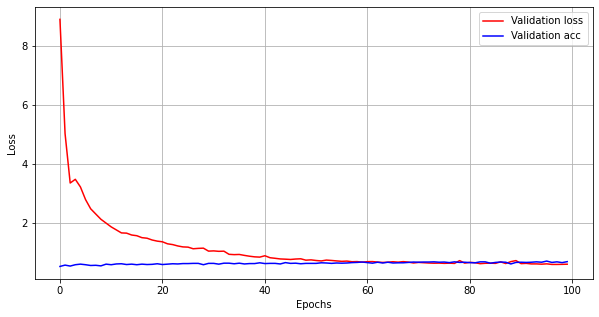

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.plot(history.history['val_loss'], '-r', label = 'Validation loss')
plt.plot(history.history['val_acc'], '-b', label = 'Validation acc')

plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()